In [ ]:
# импорт библиотек

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [20, 7]

# Шаг 1. Подготовка данных
*Создал табличку в гугле, создаю подключение*

https://docs.google.com/spreadsheets/d/1W_i5dx0vIXGBdq7Gne9Edzif3hrrBHOIb2V-HADXZd4/edit?usp=sharing

In [ ]:
# на слуйчай, если пригодится sqllite3 прямо в ноутбуке
con = sqlite3.connect('db')
def select(sql):
    return pd.read_sql(sql,con)

In [ ]:
id = '1W_i5dx0vIXGBdq7Gne9Edzif3hrrBHOIb2V-HADXZd4'
first_sheet = 'data_1_1'
second_sheet = 'data_1_2'

In [ ]:
url=f'https://docs.google.com/spreadsheet/ccc?key={id}&output=xlsx'

In [ ]:
df1 = pd.read_excel(url,sheet_name=first_sheet)
df1.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0


In [ ]:
df2 = pd.read_excel(url,sheet_name=second_sheet)
df2.head()

,Тема письма,Кликов
0,Тема1,2274.0
1,Тема2,4549.0
2,Тема3,1709.0
3,Тема4,2136.0
4,Тема5,1635.0


In [ ]:
df1.dtypes

Тема письма                 object
Сегмент                     object
Дата рассылки       datetime64[ns]
Время отправки              object
Отправлено писем           float64
Отписки                    float64
Доставлено                 float64
Открытий                   float64
Заказы                     float64
Доход                      float64
dtype: object

In [ ]:
df2.dtypes

Тема письма     object
Кликов         float64
dtype: object

Лично я привык сразу приводить имена колонок к приемлемому для питона и sql виду.

In [ ]:
df1.columns

Index(['Тема письма', 'Сегмент', 'Дата рассылки', 'Время отправки',
       'Отправлено писем', 'Отписки', 'Доставлено', 'Открытий', 'Заказы',
       'Доход '],
      dtype='object')

In [ ]:
df2.columns

Index(['Тема письма', 'Кликов'], dtype='object')

In [ ]:
df1 = df1.rename(columns={'Тема письма':'subject', 'Сегмент':'segment','Дата рассылки':'mailing_date',
                     'Время отправки':'sending_time','Отправлено писем':'emails_sent', 'Отписки':'unsubscriptions',
                     'Доставлено':'delivered', 'Открытий':'opened', 'Заказы':'orders','Доход ':'revenue'})
df2 = df2.rename(columns={'Тема письма':'subject', 'Кликов':'clicks'})

In [ ]:
df1.head(1)

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0


In [ ]:
df2.head(1)

,subject,clicks
0,Тема1,2274.0


Для удобства, сразу объединим датафреймы:

In [ ]:
df=df1.merge(df2, on = 'subject')

In [ ]:
df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0


# Шаг 2. Постановка задачи


*От нас требуется проанализировать следующие метрики:*

1. Динамика open rate
2. Динамика click to open rate
3. Динамика conversion rate
4. Динамика AOV
5. Топ лучших тем по open rate
6. Лучший день недели для оптравки писем
7. Динамика оттока базы

# Шаг 3. Анализ

## 3.1 Динамика open rate

In [ ]:
# Open Rate = количество открытий / количество доставленных писем × 100%

df = df.assign(open_rate = df.opened / df.delivered * 100)


In [ ]:
df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.537776
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.870428
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.758144
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.500642
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.924218


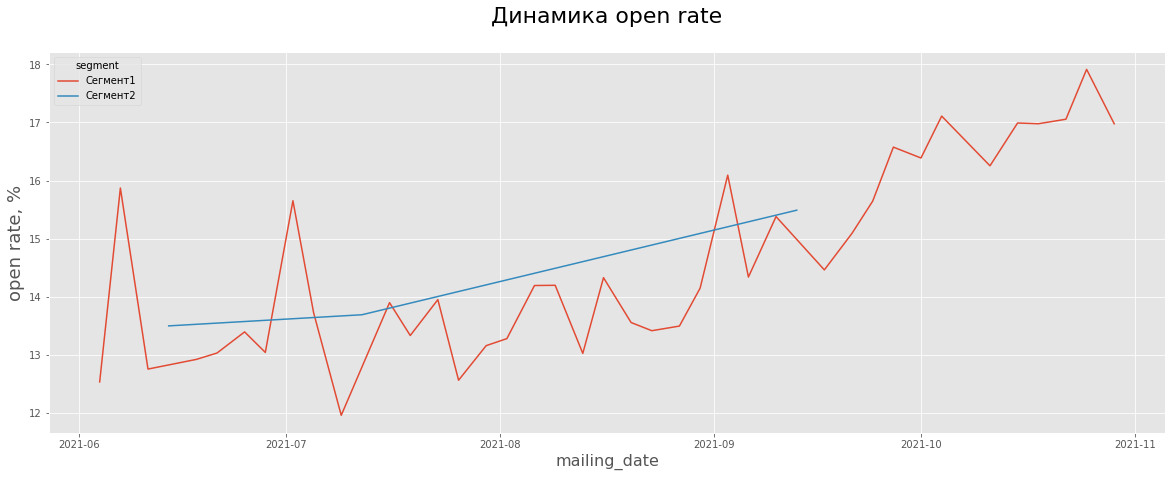

In [ ]:
ax = sns.lineplot(data=df, x='mailing_date', y='open_rate',hue ='segment')
plt.title('Динамика open rate\n', fontsize=22)
plt.ylabel('open rate, %', fontsize=18)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()


*Видим, что open_rate, кажется, растет. В динамике есть очевидные скочки в конкретные даты, можем далее установить эти даты и попытаться выяснить причину скачков.*

*Можем немного сгладить эти колебания, чтобы было проще оценить общую картину.*

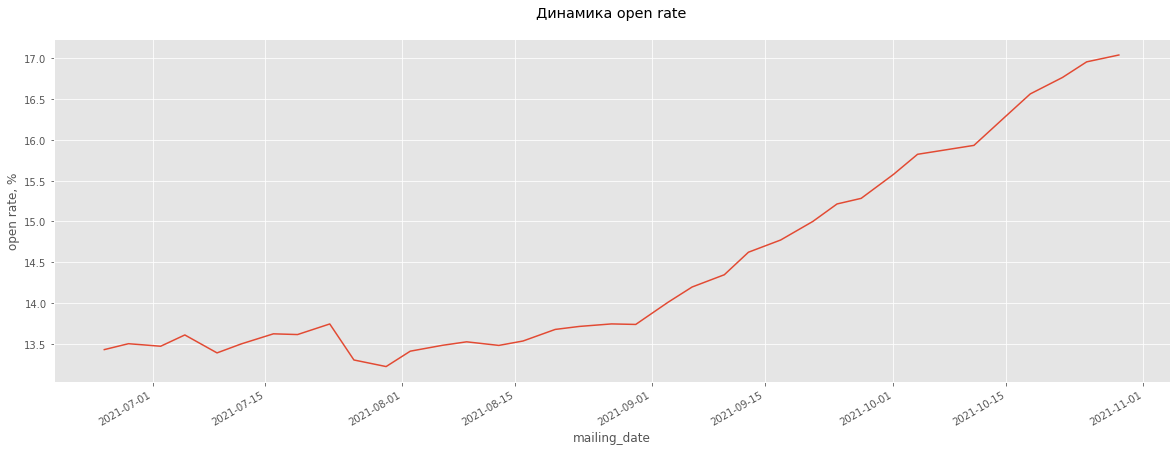

In [ ]:
df.groupby('mailing_date') \
    .agg({'open_rate':'mean'}) \
    .rolling(7) \
    .mean() \
    .plot(kind='line',
          title = 'Динамика open rate\n',
          xlabel = 'mailing_date',
          ylabel = 'open rate, %',
          legend=False)
plt.show()

## 3.2 Динамика click to open rate

In [ ]:
# CTOR = количество кликов / количество открытий письма × 100%

df = df.assign(ctor = df.clicks / df.opened * 100)

In [ ]:
df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.537776,3.233742
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.870428,5.146859
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.758144,2.412649
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.500642,2.855119
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.924218,2.290622


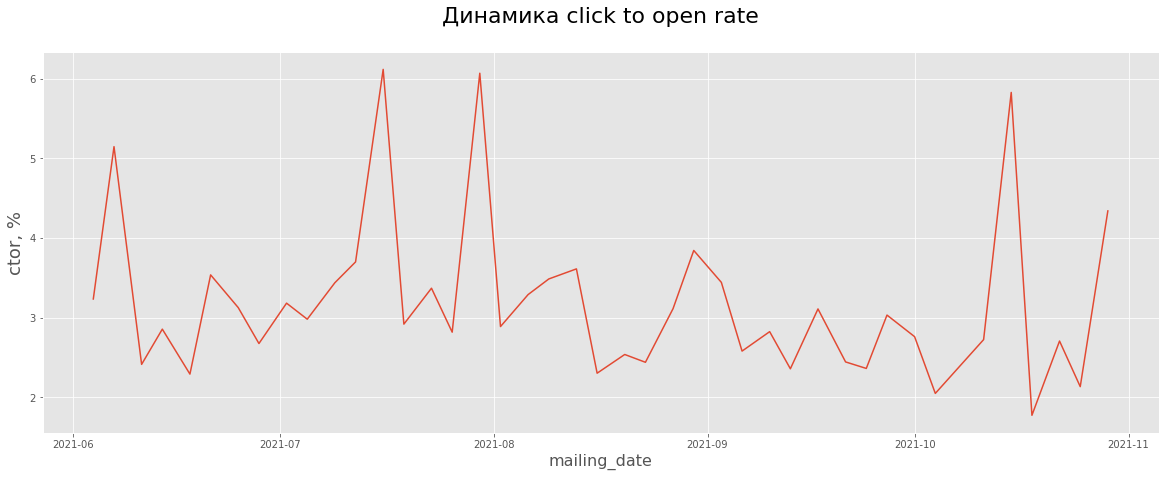

In [ ]:
ax = sns.lineplot(data=df, x='mailing_date', y='ctor')
plt.title('Динамика click to open rate\n', fontsize=22)
plt.ylabel('ctor, %', fontsize=18)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()

* Видим, что click to open rate(ctor) колеблится, имеются очевидные скачки в конкретные даты

* Можем также немного сгладить эти колебания, чтобы было проще оценить общую картину.

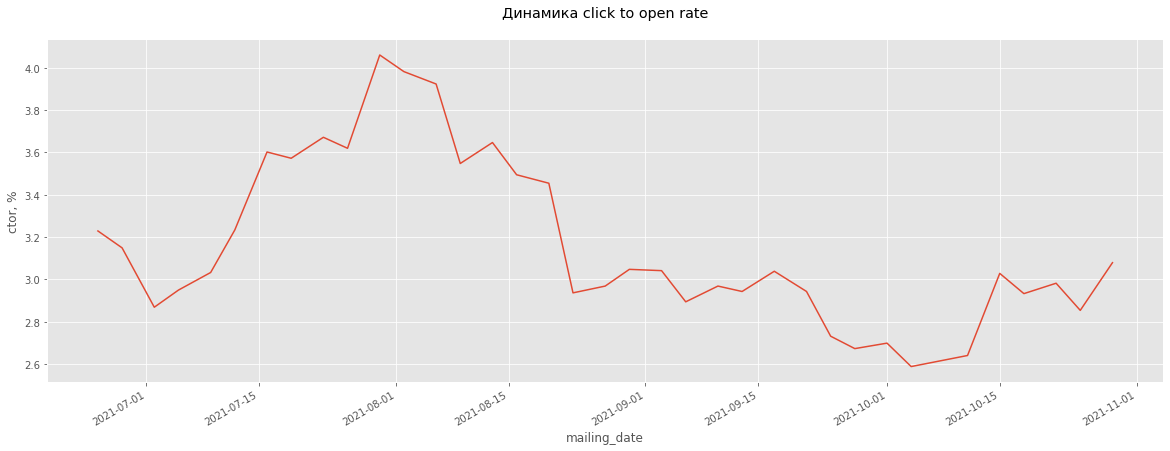

In [ ]:
df.groupby('mailing_date') \
    .agg({'ctor':'mean'}) \
    .rolling(7) \
    .mean() \
    .plot(kind='line',
          title = 'Динамика click to open rate\n',
          xlabel = 'mailing_date',
          ylabel = 'ctor, %',
          legend=False)
plt.show()

*Скользящее среднее показывает сначала рост с 3% до 3.8%, затем с середины августа плавный спад до 2.8%*

## 3.3 Динамика conversion rate

In [ ]:
# Conversion Rate = количество целевых действий (в неш случае это оформленный заказ) / количество доставленных писем × 100%
df = df.assign(conversion_rate = df.orders / df.delivered * 100)
df.head()


,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor,conversion_rate
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.537776,3.233742,0.013372
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.870428,5.146859,0.037529
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.758144,2.412649,0.012608
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.500642,2.855119,0.013534
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.924218,2.290622,0.009415


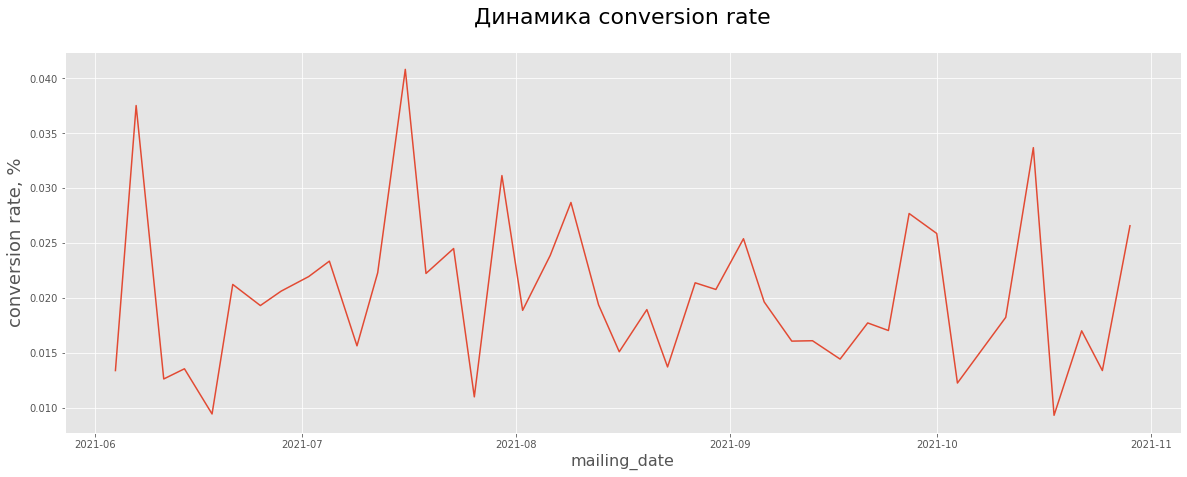

In [ ]:
ax = sns.lineplot(data=df, x='mailing_date', y='conversion_rate')
plt.title('Динамика conversion rate\n', fontsize=22)
plt.ylabel('conversion rate, %', fontsize=18)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()

*В случае с конверсией точно непонятно, как оценить динамику по такому графику, поэтому также визуализируем скользящее среднее.*

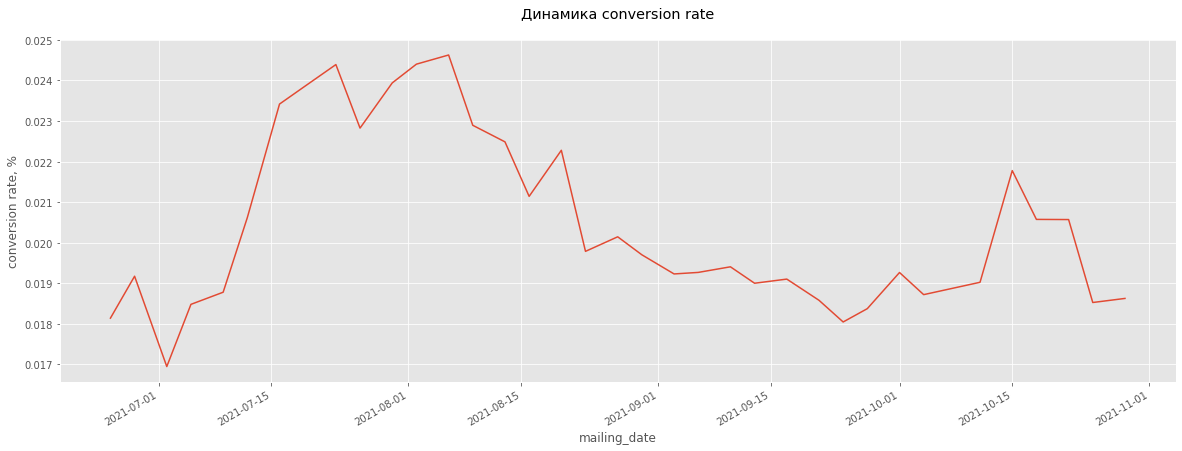

In [ ]:
df.groupby('mailing_date') \
    .agg({'conversion_rate':'mean'}) \
    .rolling(7) \
    .mean() \
    .plot(kind='line', title = 'Динамика conversion rate\n', xlabel = 'mailing_date', ylabel = 'conversion rate, %',legend=False)
plt.show()

In [ ]:
df.conversion_rate.mean().round(2)

0.02

*Скользящее среднее показывает, что за отчетный период конверсия колеблется в пределах своего среднего значения 0.2%*

## 3.4 Динамика AOV

In [ ]:
# AOV = Общий доход с продаж / количество продаж
# тут позволю себе сразу округлить до копеек
df = df.assign(aov = df.revenue / df.orders).round(2)
df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor,conversion_rate,aov
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.54,3.23,0.01,101517.01
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.87,5.15,0.04,33052.61
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.76,2.41,0.01,50836.90
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.50,2.86,0.01,82772.05
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.92,2.29,0.01,132804.69


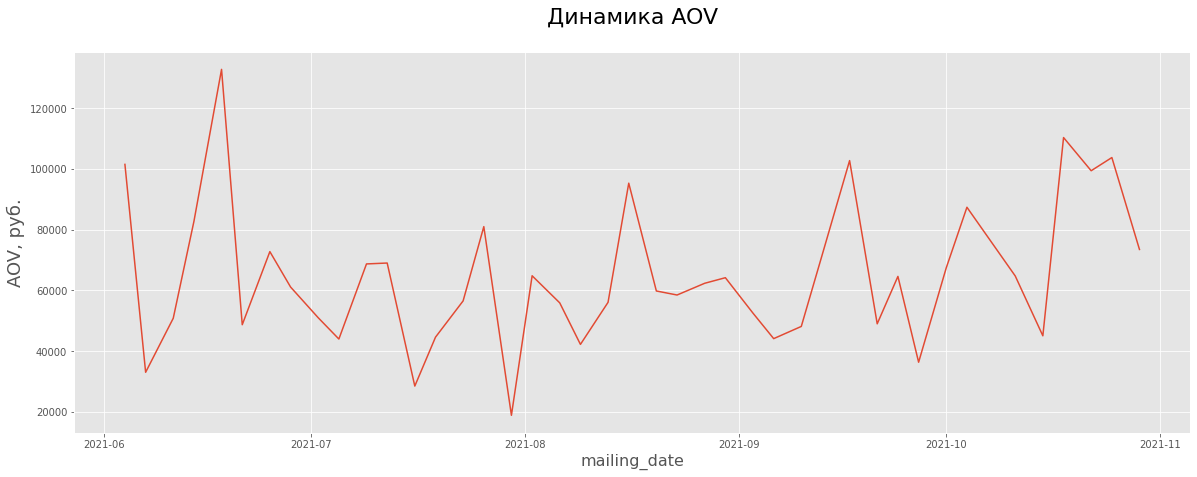

In [ ]:
ax = sns.lineplot(data=df, x='mailing_date', y='aov')
plt.title('Динамика AOV\n', fontsize=22)
plt.ylabel('AOV, руб.', fontsize=18)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()

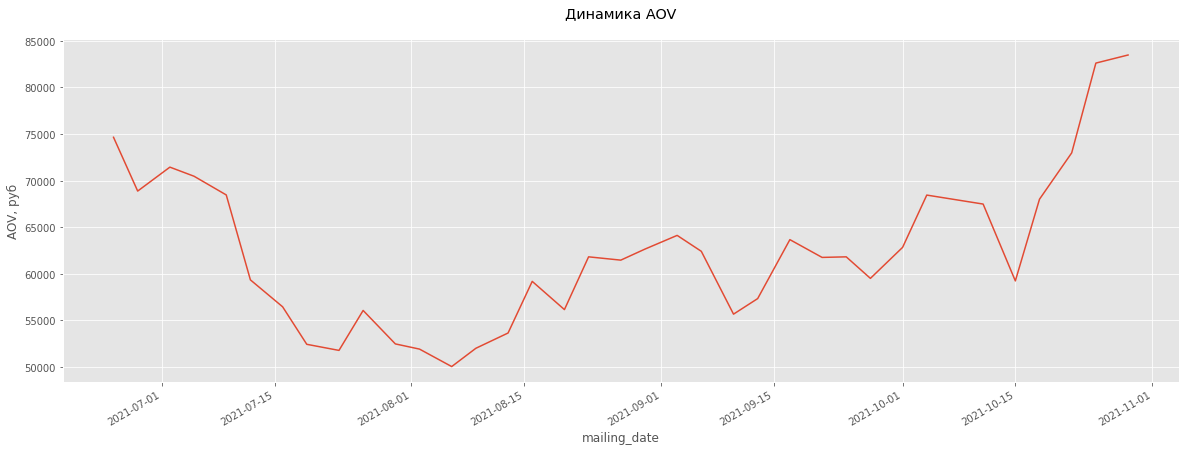

In [ ]:
df.groupby('mailing_date') \
    .agg({'aov':'mean'}) \
    .rolling(7) \
    .mean() \
    .plot(kind='line', title = 'Динамика AOV\n', xlabel = 'mailing_date', ylabel = 'AOV, руб',legend=False)
plt.show()

## 3.5 Топ лучших тем по open rate

In [ ]:
# Для разнообразия задействуем sql:
# Видим, что темы не повторяются, поэтому group by не понадобится

In [ ]:
data = df.to_sql('df',con,index=False,if_exists='replace')

In [ ]:
sql='''
select * 
from df
limit 5
'''
select(sql)

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor,conversion_rate,aov
0,Тема1,Сегмент1,2021-06-04 00:00:00,15:00:00.000000,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.54,3.23,0.01,101517.01
1,Тема2,Сегмент1,2021-06-07 00:00:00,17:22:00.000000,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.87,5.15,0.04,33052.61
2,Тема3,Сегмент1,2021-06-11 00:00:00,16:00:00.000000,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.76,2.41,0.01,50836.90
3,Тема4,Сегмент2,2021-06-14 00:00:00,15:00:00.000000,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.50,2.86,0.01,82772.05
4,Тема5,Сегмент1,2021-06-18 00:00:00,16:00:00.000000,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.92,2.29,0.01,132804.69


In [ ]:
sql = '''
select 
    t.subject, 
    t.open_rate
from df t
order by t.open_rate desc

'''
open_rate = select(sql)

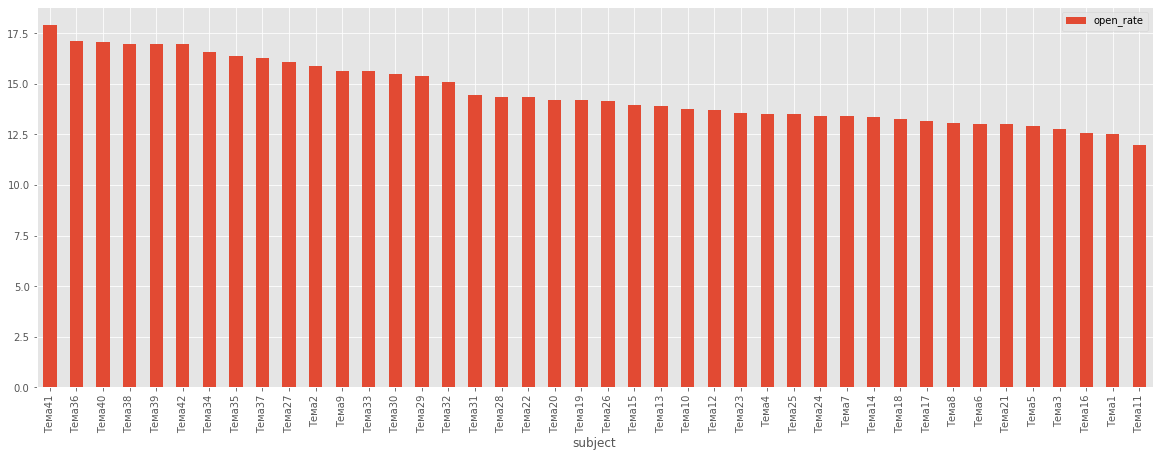

In [ ]:
open_rate \
    .set_index('subject') \
    .plot(kind='bar')
plt.show()

*Оценив общее распределение open rate по темам, заметим, что есть явный лидер, а затем 5 тем с близким индексом, поэтому выделим в ТОП первые 6 тем:*

In [ ]:
sql = '''
select 
    t.subject, 
    t.open_rate
from df t
order by t.open_rate desc
limit 6

'''
select(sql)

,subject,open_rate
0,Тема41,17.91
1,Тема36,17.11
2,Тема40,17.05
3,Тема38,16.99
4,Тема39,16.98
5,Тема42,16.98


## 3.6 Лучший день недели для оптравки писем

In [ ]:
# Добавим к нашему датафрейму новый столбец - номер дня недели:
# Где 0-Понедельник, 6 -Воскресенье

In [ ]:
df = df.assign(day_of_week = df.mailing_date.dt.dayofweek)
df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor,conversion_rate,aov,day_of_week
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.54,3.23,0.01,101517.01,4
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.87,5.15,0.04,33052.61,0
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.76,2.41,0.01,50836.90,4
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.50,2.86,0.01,82772.05,0
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.92,2.29,0.01,132804.69,4


In [ ]:
df.day_of_week.value_counts()

4    21
0    20
1     1
Name: day_of_week, dtype: int64

*Видим, что сравнивать между собой логично только 2 дня - Понедельник и Пятницу, так как выборка будет примерно одинаковая по количеству, учитывать вторник не будем*

*Для определения лучшего дня недели сравним полученные ранее показатели, дополнитеьно ,при прочих равных, так же оценим отписавшихся пользователей и среднюю прибыль*

In [ ]:
best_day_data = df.query('day_of_week == 0 |day_of_week == 4') \
    .groupby('day_of_week') \
    .agg({'open_rate':'mean',
          'ctor':'mean',
          'conversion_rate':'mean',
          'aov':'mean',
          'unsubscriptions':'mean',
          'revenue':'mean'         
          })
best_day_data

,open_rate,ctor,conversion_rate,aov,unsubscriptions,revenue
day_of_week,,,,,,
0,14.640000,2.91200,0.019000,65386.00450,475.00000,5.967754e+06
4,14.452381,3.48381,0.021429,65205.62619,415.52381,6.460812e+06


*Отметим, что open rate и AOV примерно равны, индекс конверсии и кликов выше в пятницу. Принимая в расчет так же показатели отписавшихся и среднюю прибыль, мне кажется, что лучший день - Пятница.*

# Шаг 4. Дополнительные метрики

**Существует еще несколько метрик для оценки эффективности email-рассылки, например:**

* Процент недоставленных писем (Bounce rate)
* Доставляемость (Delivery rate) - отношение кол-ва доставленных к кол-ву отправленных писем
* Коэффициент отписок (Unsubscribe rate) - отношение кол-ва отписавшихся к кол-ву получивших письма

Визуализруем эти показатели дополнителньо, маркетологу будет приятно 💫

In [ ]:
df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor,conversion_rate,aov,day_of_week
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.54,3.23,0.01,101517.01,4
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.87,5.15,0.04,33052.61,0
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.76,2.41,0.01,50836.90,4
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.50,2.86,0.01,82772.05,0
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.92,2.29,0.01,132804.69,4


In [ ]:
df = df.assign(bounce_rate = (df.emails_sent - df.delivered) * 100 / df.emails_sent)
df = df.assign(delivery_rate = df.delivered * 100 / df.emails_sent)
df = df.assign(unsubscribe_rate = df.unsubscriptions  * 100 / df.delivered)

df.head()

,subject,segment,mailing_date,sending_time,emails_sent,unsubscriptions,delivered,opened,orders,revenue,clicks,open_rate,ctor,conversion_rate,aov,day_of_week,bounce_rate,delivery_rate,unsubscribe_rate
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,2274.0,12.54,3.23,0.01,101517.01,4,0.042950,99.957050,0.078449
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,4549.0,15.87,5.15,0.04,33052.61,0,0.039129,99.960871,0.085472
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,1709.0,12.76,2.41,0.01,50836.90,4,0.043388,99.956612,0.090776
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,2136.0,13.50,2.86,0.01,82772.05,0,0.043111,99.956889,0.091853
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,1635.0,12.92,2.29,0.01,132804.69,4,0.037105,99.962895,0.078764


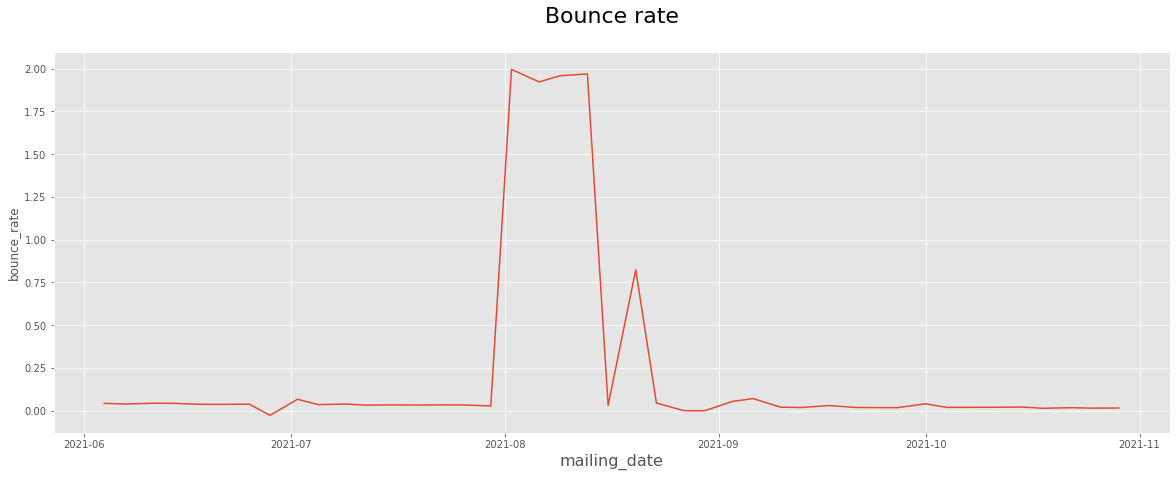

In [ ]:

sns.lineplot(data=df, x='mailing_date', y='bounce_rate')
plt.title('Bounce rate\n', fontsize=22)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()

*Заметно, что в первой половине августа были какие то проблемы с доставкой, которые привели к резкому скачку индекса недоставленных писем*

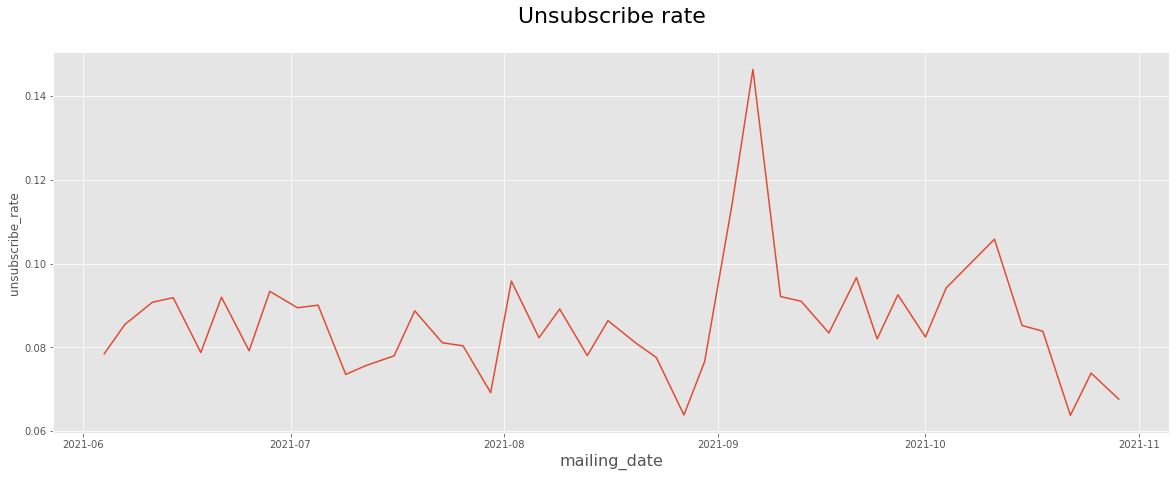

In [ ]:
sns.lineplot(data=df, x='mailing_date', y='unsubscribe_rate')
plt.title('Unsubscribe rate\n', fontsize=22)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()

*Так же можно заметить скачок индекса отписок связанный с одной конкретной рассылкой, видимо содержание  письма не понравилось пользователям. Можно посмотреть что это была за реклама и какие особенности были у той рассылки, возможно были применены решения, которые оттолкнули в два раза больше пользователй, чем обычно*

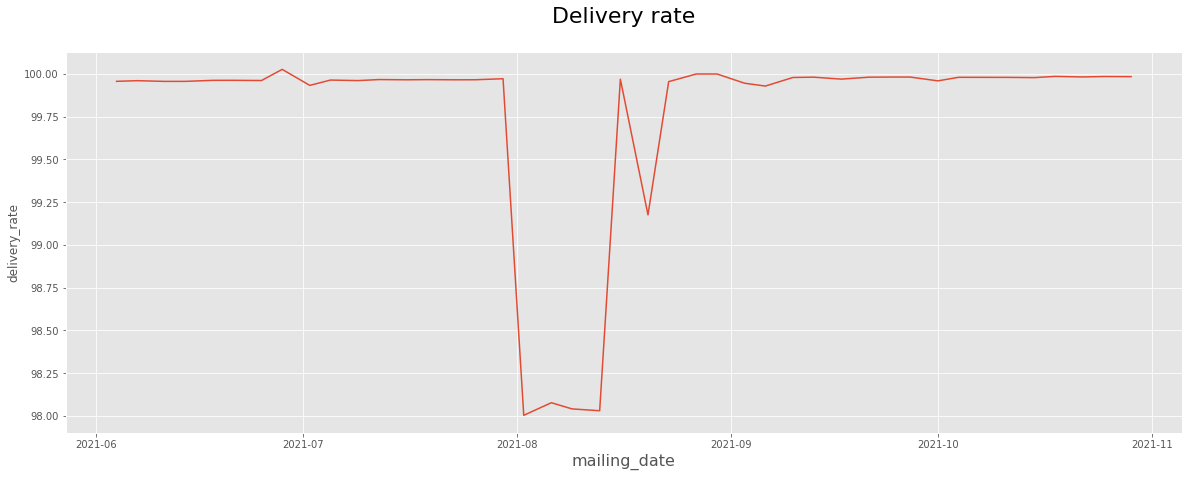

In [ ]:
sns.lineplot(data=df, x='mailing_date', y='delivery_rate')
plt.title('Delivery rate\n', fontsize=22)
plt.xlabel('mailing_date', fontsize=16,)
plt.show()

*Наблюдаем подтверждение выводов по Bounce rate. В эти даты определенно быда какая-то проблема*